<a href="https://colab.research.google.com/github/Igor335566/flow_keypoint_detection/blob/main/notebooks/train-yolov8-keypoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [2]:
!nvidia-smi

Thu Jul 17 22:22:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

To install YOL0v8, run the following command:

In [4]:
!pip install ultralytics==8.2.103 -q

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


Now, we can import YOLOv8 into our Notebook:

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from google.colab import userdata

from roboflow import Roboflow
rf = Roboflow(api_key=userdata.get('roboflow'))
project = rf.workspace("igor-doroshchenko").project("vortex-flow-segmentation")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vortex-flow-segmentation-2 in yolov8:: 100%|██████████| 410/410 [00:00<00:00, 6841.41it/s]


In [8]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

## Train a YOLOv8 Keypoint Detection Model

With our dataset downloaded, we can now train a YOLOv8 keypoint detection model. Run the code snippet below to start training your model:

In [9]:
%cd {HOME}
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640)

/content


100%|██████████| 6.52M/6.52M [00:00<00:00, 87.9MB/s]


New https://pypi.org/project/ultralytics/8.3.167 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=/content/datasets/Vortex-flow-segmentation-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[7, 3]

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  

100%|██████████| 6.25M/6.25M [00:00<00:00, 92.2MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/Vortex-flow-segmentation-2/train/labels... 174 images, 57 backgrounds, 0 corrupt: 100%|██████████| 174/174 [00:00<00:00, 2213.51it/s]

train: New cache created: /content/datasets/Vortex-flow-segmentation-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/datasets/Vortex-flow-segmentation-2/valid/labels... 16 images, 5 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 1663.37it/s]

val: New cache created: /content/datasets/Vortex-flow-segmentation-2/valid/labels.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.38G      2.154      7.885     0.7483      5.241      2.058         26        640: 100%|██████████| 11/11 [00:07<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         16         22     0.0248      0.818     0.0463     0.0207          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.19G      1.332      7.355      0.711      1.368      1.324         31        640: 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         16         22      0.818      0.819      0.861      0.435          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.28G      1.129      6.639     0.6731     0.8425      1.174         35        640: 100%|██████████| 11/11 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         16         22          1      0.857      0.942      0.597          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.2G     0.9939       6.01     0.6757     0.7056      1.089         20        640: 100%|██████████| 11/11 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


                   all         16         22      0.925      0.682      0.711      0.402          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.28G      1.003      5.497     0.6635     0.7146      1.083         38        640: 100%|██████████| 11/11 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         16         22      0.987      0.955      0.971      0.655      0.488      0.273       0.18      0.018



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.28G     0.9971      5.184     0.6482     0.7229      1.085         31        640: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         16         22          1       0.27      0.284      0.215      0.426     0.0455     0.0241    0.00241



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.19G      1.014      4.753      0.629      0.674      1.074         31        640: 100%|██████████| 11/11 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         16         22      0.977      0.364      0.436      0.294      0.177      0.157     0.0721     0.0148



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.19G      0.961      4.578     0.6187     0.6932      1.074         37        640: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         16         22      0.943      0.909      0.972      0.577      0.647        0.5      0.461      0.066



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.19G     0.9739      4.308     0.5876     0.6468      1.065         27        640: 100%|██████████| 11/11 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         16         22      0.935      0.818      0.953      0.593      0.722      0.364      0.459     0.0804



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.19G     0.9289      3.788     0.5468     0.6167       1.02         28        640: 100%|██████████| 11/11 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         16         22      0.949          1      0.991      0.678      0.762      0.581      0.559      0.096



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.19G     0.9265      3.653     0.5198      0.604      1.051         27        640: 100%|██████████| 11/11 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         16         22      0.994          1      0.995      0.711      0.903      0.909      0.848       0.23

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.27G     0.9456      3.279     0.5003     0.6163      1.052         28        640: 100%|██████████| 11/11 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         16         22          1      0.908      0.974      0.719       0.95      0.864      0.891      0.287



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.2G     0.9102      3.117     0.4676     0.5899      1.044         35        640: 100%|██████████| 11/11 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         16         22      0.995      0.955      0.986      0.691      0.947      0.909      0.923      0.296



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.2G      0.953      3.023     0.4975     0.5986      1.048         21        640: 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         16         22      0.993          1      0.995      0.725      0.948      0.955      0.926      0.462



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.18G     0.8446      2.751     0.4551     0.5576      1.012         22        640: 100%|██████████| 11/11 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         16         22      0.855      0.807       0.91      0.618      0.762      0.582      0.651      0.339



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.31G     0.8459      2.631     0.4416     0.5297     0.9879         30        640: 100%|██████████| 11/11 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         16         22      0.996      0.955      0.985      0.771      0.949      0.909      0.927      0.607



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.2G     0.8586      2.728     0.4359      0.565      1.015         30        640: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         16         22      0.953          1      0.972      0.768       0.91      0.955      0.926      0.515



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.2G     0.8163      2.262     0.4256     0.5133      0.991         32        640: 100%|██████████| 11/11 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         16         22      0.997          1      0.995      0.787      0.952      0.955      0.945      0.594



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.19G     0.8373      2.132     0.3923     0.5003     0.9771         36        640: 100%|██████████| 11/11 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         16         22      0.998          1      0.995      0.764      0.952      0.955      0.935      0.692

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.31G     0.7942      2.005     0.4074     0.5295     0.9682         36        640: 100%|██████████| 11/11 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         16         22      0.997          1      0.995      0.776      0.952      0.955      0.926      0.743



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.23G     0.8197       1.95      0.395     0.5351     0.9679         23        640: 100%|██████████| 11/11 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         16         22      0.997          1      0.995      0.781      0.952      0.955      0.948      0.806



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.23G     0.8128      1.837     0.4037     0.5383     0.9804         14        640: 100%|██████████| 11/11 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         16         22       0.99          1      0.995      0.732      0.944      0.955      0.935      0.773



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.19G     0.7904      1.657     0.3902     0.5112     0.9808         29        640: 100%|██████████| 11/11 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         16         22      0.997          1      0.995      0.709      0.952      0.955      0.923      0.732



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.28G     0.7805      1.563      0.399     0.4939      0.972         40        640: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         16         22      0.996          1      0.995      0.779      0.951      0.955       0.94      0.752



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.2G     0.8437      1.443     0.3647      0.512     0.9833         27        640: 100%|██████████| 11/11 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         16         22      0.996          1      0.995      0.759      0.951      0.955      0.934      0.815

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.2G     0.8264      1.369      0.348     0.4884     0.9491         26        640: 100%|██████████| 11/11 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         16         22      0.996          1      0.995      0.742      0.951      0.955      0.934      0.792



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.22G     0.8075       1.33      0.355     0.4877     0.9866         28        640: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         16         22      0.996          1      0.995      0.749      0.951      0.955      0.941      0.799



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.28G     0.7512      1.211     0.3631     0.4666     0.9704         30        640: 100%|██████████| 11/11 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         16         22      0.997          1      0.995      0.764      0.951      0.955      0.928       0.78



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.2G     0.7493      1.207      0.368     0.4623     0.9626         22        640: 100%|██████████| 11/11 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         16         22      0.997          1      0.995      0.788      0.952      0.955      0.929      0.812



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.2G     0.7697      1.289     0.4216     0.4843     0.9774         20        640: 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         16         22      0.913      0.948      0.953      0.681      0.869      0.904      0.915      0.713



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.18G     0.7907      1.238     0.3694     0.4817     0.9879         19        640: 100%|██████████| 11/11 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         16         22      0.997          1      0.995      0.776      0.952      0.955       0.95      0.787



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.28G     0.8092      1.237     0.3899     0.4961     0.9746         19        640: 100%|██████████| 11/11 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         16         22      0.997      0.909      0.991      0.708        0.8      0.909      0.883      0.429



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.2G     0.7596      1.111     0.3499     0.4622     0.9691         30        640: 100%|██████████| 11/11 [00:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         16         22      0.954       0.95      0.988      0.723      0.909      0.904      0.921      0.774



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.2G     0.7046      1.051     0.3481     0.4498      0.937         33        640: 100%|██████████| 11/11 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         16         22          1          1      0.995      0.796      0.955      0.955      0.943      0.877



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.19G      0.736      0.987     0.3672     0.4575       0.97         38        640: 100%|██████████| 11/11 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         16         22      0.997          1      0.995      0.807      0.952      0.955      0.952      0.876



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.28G      0.739      1.011      0.352     0.4485     0.9399         31        640: 100%|██████████| 11/11 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         16         22      0.997          1      0.995      0.828      0.952      0.955      0.953      0.823



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.2G     0.7545     0.9534      0.346     0.4551     0.9621         25        640: 100%|██████████| 11/11 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         16         22      0.997          1      0.995      0.842      0.952      0.955      0.948      0.768



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.2G     0.7166     0.8774     0.3383     0.4294     0.9265         22        640: 100%|██████████| 11/11 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         16         22      0.997          1      0.995      0.821      0.952      0.955      0.953      0.897



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.19G     0.7071     0.8754     0.3135     0.4248     0.9369         25        640: 100%|██████████| 11/11 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         16         22      0.997          1      0.995      0.826      0.952      0.955      0.952      0.881



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.28G     0.7138      1.001     0.3609     0.4466     0.9342         24        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         16         22      0.997          1      0.995      0.773      0.952      0.955      0.956      0.899



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.2G     0.7171     0.9615     0.3555     0.4296     0.9468         30        640: 100%|██████████| 11/11 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         16         22      0.997          1      0.995      0.791      0.952      0.955      0.956      0.906



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.2G     0.7298     0.9084     0.3373     0.4491     0.9536         19        640: 100%|██████████| 11/11 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         16         22      0.997          1      0.995       0.75      0.952      0.955      0.951      0.853



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.18G     0.7322     0.9687     0.3913      0.447     0.9352         28        640: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         16         22      0.997          1      0.995      0.782      0.952      0.955      0.955      0.899



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.27G     0.7203     0.9674     0.3329      0.439     0.9455         29        640: 100%|██████████| 11/11 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         16         22      0.997          1      0.995      0.812      0.952      0.955      0.954      0.903



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100       2.2G     0.7063     0.7984     0.3783     0.4117      0.958         25        640: 100%|██████████| 11/11 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         16         22      0.997          1      0.995      0.817      0.952      0.955      0.954      0.898



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.2G     0.7373      0.938     0.3994     0.4341     0.9473         27        640: 100%|██████████| 11/11 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         16         22      0.998          1      0.995      0.812      0.953      0.955      0.953      0.897



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.19G     0.7005      1.042     0.3836     0.4233     0.9373         19        640: 100%|██████████| 11/11 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         16         22      0.997          1      0.995      0.802      0.952      0.955       0.94       0.89



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.28G        0.7     0.8154     0.3444     0.4234     0.9381         42        640: 100%|██████████| 11/11 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all         16         22      0.998          1      0.995      0.819      0.952      0.955      0.941      0.848



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.2G     0.6685     0.7848     0.3304     0.4051     0.9114         32        640: 100%|██████████| 11/11 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         16         22      0.998          1      0.995      0.816      0.952      0.955      0.941      0.867



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.23G     0.6626     0.7895     0.3222     0.3975     0.9244         40        640: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         16         22      0.997          1      0.995      0.815      0.952      0.955      0.959      0.885

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.19G      0.662      0.789     0.3172     0.4003     0.9262         34        640: 100%|██████████| 11/11 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         16         22          1          1      0.995      0.825      0.955      0.955      0.964      0.911



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.31G     0.6393     0.7705     0.3319     0.3958     0.8999         37        640: 100%|██████████| 11/11 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         16         22      0.997          1      0.995      0.841      0.952      0.955      0.957      0.908



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.19G     0.6351      0.797     0.3753     0.3881     0.9192         28        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         16         22      0.998          1      0.995      0.848      0.952      0.955      0.947      0.877



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.2G     0.6635     0.8081     0.3238     0.3989     0.9095         26        640: 100%|██████████| 11/11 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         16         22      0.998          1      0.995      0.805      0.952      0.955      0.932      0.854



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.18G     0.6991     0.7147     0.3809     0.4115     0.9417         21        640: 100%|██████████| 11/11 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         16         22      0.997          1      0.995      0.836      0.952      0.955      0.934      0.863



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.28G     0.6678     0.7813     0.3334     0.4018     0.9237         22        640: 100%|██████████| 11/11 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         16         22      0.998          1      0.995      0.779      0.953      0.955       0.95      0.894



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.2G     0.7052     0.8302      0.332     0.4102     0.9429         34        640: 100%|██████████| 11/11 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         16         22          1          1      0.995      0.734      0.955      0.955      0.955      0.883



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.23G     0.6691     0.6817     0.3335     0.4023     0.9262         27        640: 100%|██████████| 11/11 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         16         22          1          1      0.995      0.799      0.955      0.955      0.947      0.884



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.19G      0.667     0.7834     0.3437     0.3997     0.9156         38        640: 100%|██████████| 11/11 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         16         22          1      0.995      0.995      0.778      0.954      0.949      0.946       0.88



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.27G     0.6791     0.7689     0.3787     0.4038     0.9418         24        640: 100%|██████████| 11/11 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         16         22      0.998          1      0.995      0.817      0.952      0.955      0.953      0.905



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.2G     0.6322     0.7825     0.3143     0.3823     0.9223         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         16         22          1          1      0.995      0.834      0.955      0.955       0.96      0.932



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.2G     0.6492     0.7229      0.372     0.3941     0.9147         37        640: 100%|██████████| 11/11 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         16         22      0.997          1      0.995      0.849      0.952      0.955      0.956      0.906



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.22G     0.6071     0.6209     0.2844     0.3612     0.8845         33        640: 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         16         22      0.997          1      0.995      0.837      0.952      0.955      0.947      0.902



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.28G     0.6232     0.6436     0.2934     0.3778     0.9024         24        640: 100%|██████████| 11/11 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         16         22      0.997          1      0.995       0.84      0.952      0.955       0.95      0.909



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.2G     0.6335     0.6828     0.3479     0.3897     0.9228         20        640: 100%|██████████| 11/11 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         16         22      0.998          1      0.995      0.844      0.952      0.955      0.956      0.921



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.2G      0.596     0.6332     0.3041     0.3554     0.8818         22        640: 100%|██████████| 11/11 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         16         22      0.997          1      0.995      0.814      0.952      0.955      0.951      0.896



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.19G     0.6089     0.7376     0.3231     0.3767     0.9107         32        640: 100%|██████████| 11/11 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all         16         22      0.997          1      0.995       0.81      0.952      0.955      0.952      0.906

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.28G     0.5911     0.6793     0.3228     0.3604     0.8998         28        640: 100%|██████████| 11/11 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         16         22          1          1      0.995      0.806      0.955      0.955       0.96      0.908



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.23G     0.5973     0.6829     0.3151     0.3748     0.9021         26        640: 100%|██████████| 11/11 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         16         22      0.997          1      0.995      0.803      0.952      0.955      0.954      0.914



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.2G     0.5892     0.7376     0.3424     0.3621     0.8985         28        640: 100%|██████████| 11/11 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         16         22      0.997          1      0.995      0.782      0.952      0.955      0.956      0.912



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.19G     0.5851     0.7014     0.3049     0.3675     0.8961         23        640: 100%|██████████| 11/11 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         16         22      0.997          1      0.995      0.793      0.952      0.955      0.948      0.897



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.28G     0.5663     0.6605     0.3353     0.3486     0.8992         33        640: 100%|██████████| 11/11 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         16         22      0.997          1      0.995      0.779      0.952      0.955      0.948      0.917



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.2G     0.5749     0.6585     0.3186     0.3407     0.8816         24        640: 100%|██████████| 11/11 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         16         22      0.998          1      0.995      0.835      0.952      0.955      0.944      0.909



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.2G     0.5719     0.6725     0.3235     0.3446     0.8804         30        640: 100%|██████████| 11/11 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         16         22      0.998          1      0.995      0.828      0.952      0.955      0.957       0.92



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.22G      0.553       0.67     0.2827      0.339     0.8594         32        640: 100%|██████████| 11/11 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         16         22      0.997          1      0.995      0.833      0.952      0.955      0.952      0.912



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.27G     0.5789     0.7018      0.368     0.3613     0.9014         28        640: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         16         22      0.997          1      0.995      0.809      0.952      0.955      0.952      0.907



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.23G     0.5333     0.5673     0.3154     0.3246     0.8816         20        640: 100%|██████████| 11/11 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         16         22      0.997          1      0.995      0.829      0.952      0.955      0.958      0.916



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.2G     0.5739     0.5553     0.3119     0.3439     0.9033         31        640: 100%|██████████| 11/11 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         16         22      0.998          1      0.995      0.845      0.952      0.955      0.959      0.927



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.18G     0.5411     0.5517     0.3206     0.3291     0.8835         29        640: 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         16         22      0.998          1      0.995      0.811      0.952      0.955      0.956      0.914



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.28G     0.5316     0.5764      0.356     0.3329     0.8857         23        640: 100%|██████████| 11/11 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         16         22      0.997          1      0.995      0.818      0.952      0.955      0.953      0.911



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.2G     0.5455     0.5454     0.3263     0.3262      0.879         30        640: 100%|██████████| 11/11 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         16         22      0.997          1      0.995      0.838      0.952      0.955      0.951      0.916



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.2G     0.5393     0.6204     0.3004     0.3303     0.8729         26        640: 100%|██████████| 11/11 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         16         22      0.997          1      0.995      0.837      0.952      0.955       0.95      0.915



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.18G     0.5386     0.5939     0.3152     0.3309     0.8765         26        640: 100%|██████████| 11/11 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         16         22      0.998          1      0.995      0.803      0.952      0.955      0.948      0.909



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.28G     0.5224     0.5852      0.292     0.3248     0.8797         21        640: 100%|██████████| 11/11 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         16         22      0.998          1      0.995      0.825      0.952      0.955      0.958      0.925



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.19G     0.5664     0.5583     0.3413     0.3337     0.8956         23        640: 100%|██████████| 11/11 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         16         22      0.998          1      0.995      0.838      0.952      0.955      0.959      0.923



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.19G     0.5384     0.5739     0.2794     0.3464     0.8647         27        640: 100%|██████████| 11/11 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         16         22      0.998          1      0.995      0.841      0.952      0.955      0.959      0.925



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.19G     0.5277     0.5794     0.2994     0.3227     0.8641         27        640: 100%|██████████| 11/11 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         16         22      0.998          1      0.995      0.827      0.952      0.955      0.959       0.93



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.31G     0.5015     0.6178     0.2968      0.314      0.872         27        640: 100%|██████████| 11/11 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         16         22      0.998          1      0.995      0.799      0.952      0.955      0.956      0.927



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.2G     0.5317     0.6592     0.3201     0.3223      0.868         25        640: 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         16         22      0.998          1      0.995       0.81      0.952      0.955      0.959      0.923



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.2G     0.5002     0.5851     0.2681     0.3137     0.8516         24        640: 100%|██████████| 11/11 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         16         22      0.998          1      0.995      0.813      0.952      0.955      0.957      0.922


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.25G      0.465     0.4806     0.2353     0.2881      0.857         17        640: 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         16         22      0.998          1      0.995      0.811      0.952      0.955      0.959      0.917



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.27G     0.4666     0.3981      0.238     0.2951     0.8704         11        640: 100%|██████████| 11/11 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         16         22      0.998          1      0.995      0.804      0.952      0.955      0.956      0.913



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.19G      0.467       0.43     0.2125      0.284     0.8639         19        640: 100%|██████████| 11/11 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


                   all         16         22      0.997          1      0.995      0.804      0.952      0.955      0.955      0.917

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.19G     0.4561     0.3702     0.2011     0.2733     0.8515         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         16         22      0.998          1      0.995      0.798      0.952      0.955      0.957      0.921



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.18G     0.4365     0.4301     0.1947      0.274     0.8597         20        640: 100%|██████████| 11/11 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         16         22      0.998          1      0.995      0.828      0.952      0.955      0.956      0.918



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.27G     0.4299     0.3571     0.1699     0.2603      0.851         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         16         22      0.998          1      0.995      0.814      0.952      0.955      0.957      0.929

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.19G     0.4321     0.3664     0.1938     0.2683     0.8463         22        640: 100%|██████████| 11/11 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         16         22      0.998          1      0.995      0.819      0.952      0.955      0.956      0.922



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.19G     0.4194      0.352     0.1974     0.2641     0.8297         18        640: 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         16         22      0.998          1      0.995      0.825      0.952      0.955      0.956      0.922



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.18G     0.4236      0.368     0.1591     0.2595     0.8284         20        640: 100%|██████████| 11/11 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         16         22      0.998          1      0.995      0.831      0.952      0.955      0.956      0.922



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.27G     0.4405      0.358     0.2236     0.2757     0.8656         18        640: 100%|██████████| 11/11 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all         16         22      0.998          1      0.995      0.817      0.952      0.955      0.956      0.911

100 epochs completed in 0.116 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.5MB

Validating runs/pose/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-pose summary (fused): 187 layers, 3,103,934 parameters, 0 gradients, 8.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]


                   all         16         22      0.998          1      0.995      0.845      0.952      0.955      0.959      0.927
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/pose/train


Your model will train for 100 epochs. After training, you can run test your model using an image from your test set.

## Test the Keypoint Detection Model

Let's test our keypoint detection model using [supervision](https://github.com/roboflow/supervision).

In [10]:
%cd {HOME}
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])

/content

image 1/1 /content/datasets/Vortex-flow-segmentation-2/test/images/exp29_007_subtr_ABS2_lim1-0_png.rf.73615dcb5301af23c924695dd76af921.jpg: 640x640 (no detections), 9.2ms
Speed: 2.2ms preprocess, 9.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'post-discharge-flow'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],



We can visualize our keypoints using the following code:

In [11]:
# Bug in Google Colab
import locale

locale.getpreferredencoding = lambda: "UTF-8"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 5.3 MB/s eta 0:00:00


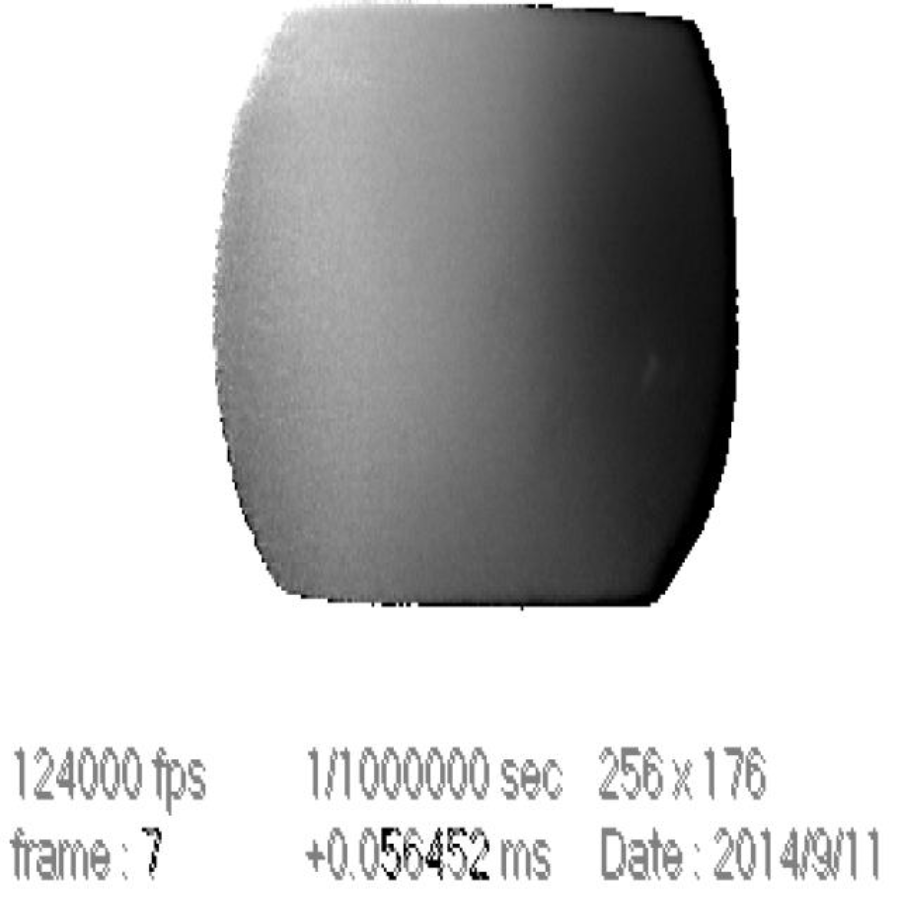

In [12]:
!pip install supervision==0.24.0 -q

import supervision as sv
import cv2

key_points = sv.KeyPoints.from_ultralytics(results[0])


vertex_annotator = sv.VertexAnnotator(radius=3, color=sv.Color.WHITE)
edge_annotator = sv.EdgeAnnotator(thickness=2, edges=[(0, 1)])

annotated_frame = cv2.imread(file_name)
annotated_frame = edge_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

annotated_frame = sv.resize_image(
    annotated_frame,
    resolution_wh=(900, 900),
    keep_aspect_ratio=True
)
sv.cv2_to_pillow(annotated_frame)

Our model successfully identified keypoints in the image.

## Calculate Keypoint Angle

When you are working with keypoints, you may want to calculate the angle between two keypoints.

In this guide, we want to calculate whether the tip of the keypoint is at a 0 degree (or close to 0, within a set tolerance) angle to the base of the tip. This would indicate the glue stick is upright.

To do so, we can use the following code:

In [13]:
import math

def check_angle_within_tolerance(xy, tolerance_degrees=5):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90

    return abs(angle_degrees - 0) <= tolerance_degrees

is_glue_upright = check_angle_within_tolerance(results[0].keypoints.xy)
is_glue_upright

ValueError: not enough values to unpack (expected 2, got 0)

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/pose/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and storage for later use.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [15]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/pose/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/igor-doroshchenko/vortex-flow-segmentation/2
Share your model with the world at: https://universe.roboflow.com/igor-doroshchenko/vortex-flow-segmentation/model/2


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistant, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image).json()
pred

running inference on IMG_4837_JPG.rf.6462a662cb217bacd93d1de1f4458e51.jpg


{'predictions': [{'inference_id': 'b7b62f0d-3a71-46d1-ae90-bab728fe7ab0',
   'time': 0.03955303400016419,
   'image': {'width': 640, 'height': 640},
   'predictions': [{'x': 113.5,
     'y': 184.5,
     'width': 155.0,
     'height': 277.0,
     'confidence': 0.7923569679260254,
     'class': 'glue',
     'class_id': 0,
     'detection_id': 'cd9edf4e-4173-4804-9262-badacd7dd426',
     'keypoints': [{'x': 156.0,
       'y': 107.0,
       'confidence': 0.9488583207130432,
       'class_id': 0,
       'class_name': '0'},
      {'x': 48.0,
       'y': 292.0,
       'confidence': 0.87955641746521,
       'class_id': 1,
       'class_name': '1'}]},
    {'x': 515.0,
     'y': 339.0,
     'width': 122.0,
     'height': 300.0,
     'confidence': 0.6757180690765381,
     'class': 'glue',
     'class_id': 0,
     'detection_id': '734718ca-0489-4af9-aa99-80e6aad21277',
     'keypoints': [{'x': 549.0,
       'y': 215.0,
       'confidence': 0.9749020338058472,
       'class_id': 0,
       'class_na

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device.

To run inference on device, first install Inference:

```bash
pip install inference inference-sdk
```

Then, create a client through which to run your model:

```python
from inference_sdk import InferenceHTTPClient, InferenceConfiguration

project_id = ""
model_version = 1
confidence = 0.75

custom_configuration = InferenceConfiguration(confidence_threshold=confidence)

client = InferenceHTTPClient(
    api_url="http://localhost:9001",
    api_key=os.environ["API_KEY"],
)

client.select_api(model_version)
```


Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Then, you can run inference on a file:

```python
results = client.infer(image_url, model_id=f"{project_id}/{model_version}")

print(predictions)
```

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

In [24]:
%cd {HOME}
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

file_name = os.path.join(f"{HOME}/test/exp30_046_subtr_ABS2_lim1.0.png")

results = model(file_name)

print(results[0])

/content

image 1/1 /content/test/exp30_046_subtr_ABS2_lim1.0.png: 416x640 2 post-discharge-flows, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'post-discharge-flow'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255,

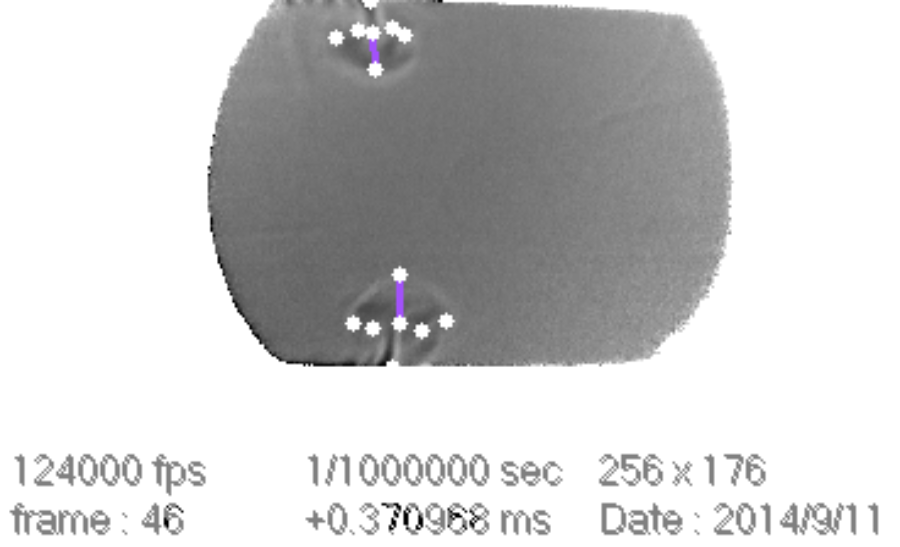

In [25]:
key_points = sv.KeyPoints.from_ultralytics(results[0])


vertex_annotator = sv.VertexAnnotator(radius=3, color=sv.Color.WHITE)
edge_annotator = sv.EdgeAnnotator(thickness=2, edges=[(0, 1)])

annotated_frame = cv2.imread(file_name)
annotated_frame = edge_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

annotated_frame = sv.resize_image(
    annotated_frame,
    resolution_wh=(900, 900),
    keep_aspect_ratio=True
)
sv.cv2_to_pillow(annotated_frame)